In [14]:
import cv2
import numpy as np
import time
import math
import copy
from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.io import loadmat

In [15]:
x = loadmat('cameraParams_50mm.mat')

In [16]:
x

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Sat Oct 27 11:22:41 2018',
 '__version__': '1.0',
 '__globals__': [],
 'None': MatlabOpaque([(b'cameraParams_50mm', b'MCOS', b'cameraParameters', array([[3707764736],
        [         2],
        [         1],
        [         1],
        [         1],
        [         1]], dtype=uint32))],
              dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')]),
 '__function_workspace__': array([[ 0,  1, 73, ...,  0,  0,  0]], dtype=uint8)}

In [17]:
x['None']

MatlabOpaque([(b'cameraParams_50mm', b'MCOS', b'cameraParameters', array([[3707764736],
       [         2],
       [         1],
       [         1],
       [         1],
       [         1]], dtype=uint32))],
             dtype=[('s0', 'O'), ('s1', 'O'), ('s2', 'O'), ('arr', 'O')])

# 读取图片

In [18]:
img1 = cv2.imread('images/1.jpg',0)  #queryimage # left image
img2 = cv2.imread('images/2.jpg',0) #trainimage # right image

# 特征匹配

In [19]:
detector = cv2.AKAZE_create()  # 好
# detector = cv2.BRISK_create()  # 一般
# detector = cv2.ORB_create()  # 太少特征点

# find the keypoints and descriptors with SIFT
kp1, des1 = detector.detectAndCompute(img1,None)
kp2, des2 = detector.detectAndCompute(img2,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(np.asarray(des1,np.float32),np.asarray(des2,np.float32), 2) #2

In [20]:
good = []
pts1 = []
pts2 = []

# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.5*n.distance:  # 调小这个系数可以使得点的数目变少，且准确度提高
        good.append(m)
        pts2.append(kp2[m.trainIdx].pt)
        pts1.append(kp1[m.queryIdx].pt)

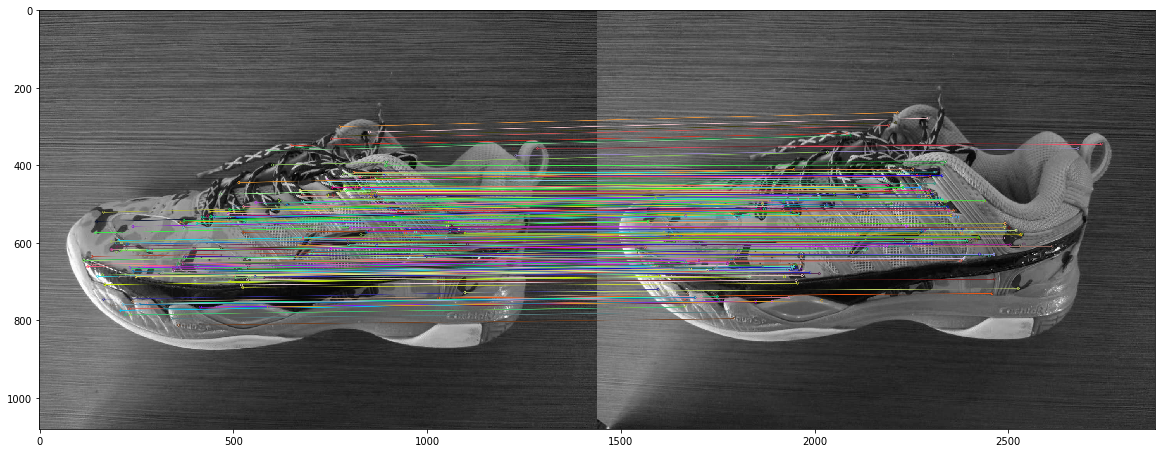

In [21]:
matches_img = cv2.drawMatches(img1, kp1, img2, kp2, good, None, flags=2)

img_size = 20
plt.figure(figsize=(img_size, img_size))
plt.imshow(matches_img)
plt.show()